In [15]:
import ipympl
import numpy as np                          # Importer funksjonalitet fra numpy biblioteket med prefiks "np"
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio
%matplotlib ipympl

fs, data = wavfile.read('../AudioFile/Split/2.wav')
xn = data/0x8000
Audio(xn, rate=fs)

C:\Users\krysk\AppData\Local\Temp\ipykernel_14860\2097910492.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read('../AudioFile/Split/2.wav')


error: 'H' format requires 0 <= number <= 65535

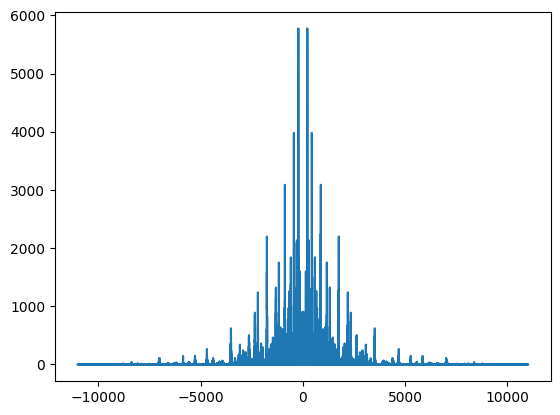

In [8]:

Ts= 1/fs
N = len(xn)

n = np.arange(0, N)
Xn = np.fft.fft(xn, N)
f = np.fft.fftfreq(N, d=1/fs)
Xm = np.abs(Xn)
plt.figure()
plt.plot(f, Xm)

In [11]:
m_max = np.argmax(Xm[:N//2])
f = m_max/N * fs
f

220.0019843349022